<a href="https://colab.research.google.com/github/MuhammadBasilKhan/chair-image-detection/blob/main/chair_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
imagesize=224
Batchsize=32
CHANNELS=3
EPOCHS=50

In [ ]:

train=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/chair data/training",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)

Found 2500 files belonging to 5 classes.


In [ ]:

class_names=train.class_names
class_names


['Comedor', 'Gamer', 'Mesedoras', 'Taburete', 'Terraza']

In [ ]:
len(train)

79

In [ ]:
test=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/chair data/testing",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)

Found 500 files belonging to 5 classes.


In [ ]:

class_names=test.class_names
class_names


['Comedor', 'Gamer', 'Mesedoras', 'Taburete', 'Terraza']

In [ ]:
dataset2=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/chair data/testing",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 500 files belonging to 5 classes.


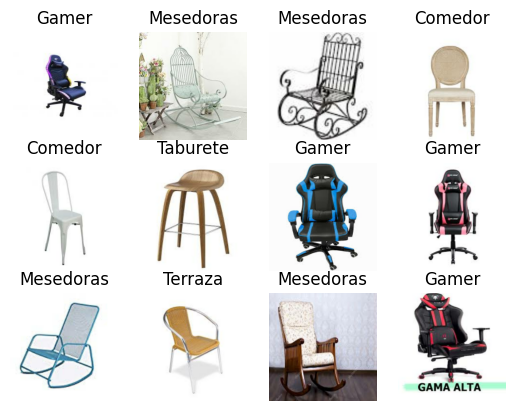

In [ ]:
for image_batch, label_batch in train.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
train_ds=train
test_ds=test
val_ds=dataset2

In [ ]:

print(len(val_ds))
print(len(test_ds))
print(len(train_ds))

16
16
79


In [ ]:

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(imagesize,imagesize),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])


In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(Batchsize,imagesize,imagesize,CHANNELS)
n_classes=5

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:

model.build(input_shape=input_shape)

In [ ]:


model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d_30 (Conv2D)          (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (32, 111, 111, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (32, 54, 54, 64)          0         
 ng2D)                                                

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



In [ ]:
history=model.fit(train_ds,
                  epochs=10,
                  batch_size=Batchsize,verbose=1,
                  validation_data=val_ds)

Epoch 1/10
79/79 [==============================] - 296s 4s/step - loss: 1.5653 - accuracy: 0.2712 - val_loss: 1.3728 - val_accuracy: 0.3960
Epoch 2/10
79/79 [==============================] - 268s 3s/step - loss: 1.3716 - accuracy: 0.3660 - val_loss: 1.2617 - val_accuracy: 0.4220
Epoch 3/10
79/79 [==============================] - 268s 3s/step - loss: 1.3157 - accuracy: 0.4132 - val_loss: 1.2968 - val_accuracy: 0.4260
Epoch 4/10
79/79 [==============================] - 268s 3s/step - loss: 1.2578 - accuracy: 0.4660 - val_loss: 1.1399 - val_accuracy: 0.5140
Epoch 5/10
79/79 [==============================] - 269s 3s/step - loss: 1.1809 - accuracy: 0.5072 - val_loss: 1.1137 - val_accuracy: 0.5380
Epoch 6/10
79/79 [==============================] - 266s 3s/step - loss: 1.1070 - accuracy: 0.5288 - val_loss: 1.0286 - val_accuracy: 0.5460
Epoch 7/10
79/79 [==============================] - 267s 3s/step - loss: 1.0709 - accuracy: 0.5592 - val_loss: 0.9970 - val_accuracy: 0.6060
Epoch 8/10
79

In [ ]:
history=model.fit(train_ds,
                  epochs=30,
                  batch_size=Batchsize,verbose=1,
                  validation_data=val_ds)

Epoch 1/30
79/79 [==============================] - 270s 3s/step - loss: 0.8912 - accuracy: 0.6380 - val_loss: 0.8934 - val_accuracy: 0.6520
Epoch 2/30
79/79 [==============================] - 265s 3s/step - loss: 0.9006 - accuracy: 0.6316 - val_loss: 0.9217 - val_accuracy: 0.6200
Epoch 3/30
79/79 [==============================] - 267s 3s/step - loss: 0.8592 - accuracy: 0.6464 - val_loss: 0.9484 - val_accuracy: 0.6140
Epoch 4/30
79/79 [==============================] - 268s 3s/step - loss: 0.8119 - accuracy: 0.6764 - val_loss: 0.8581 - val_accuracy: 0.6500
Epoch 5/30
79/79 [==============================] - 271s 3s/step - loss: 0.7851 - accuracy: 0.6880 - val_loss: 0.7814 - val_accuracy: 0.6740
Epoch 6/30
79/79 [==============================] - 277s 3s/step - loss: 0.7733 - accuracy: 0.7016 - val_loss: 0.7929 - val_accuracy: 0.6720
Epoch 7/30
79/79 [==============================] - 270s 3s/step - loss: 0.7463 - accuracy: 0.7064 - val_loss: 0.7826 - val_accuracy: 0.6880
Epoch 8/30
79

In [ ]:


model.evaluate(test_ds)

16/16 [==============================] - 17s 920ms/step - loss: 0.4743 - accuracy: 0.8460


[0.47426751255989075, 0.8460000157356262]

In [ ]:


history.params

{'verbose': 1, 'epochs': 30, 'steps': 79}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
first image to predict
actual label: Mesedoras
1/1 [==============================] - 1s 1s/step
2
predicted label: Mesedoras


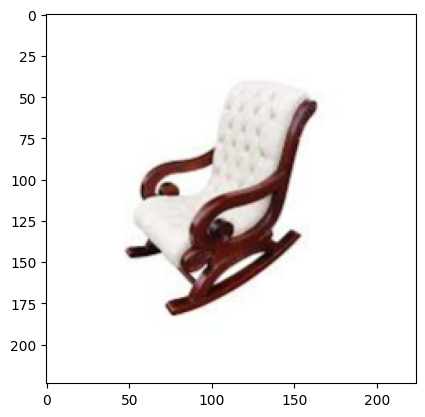

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  print(images_batch[0].numpy().astype('uint8'))
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print(np.argmax(batch_prediction[0]))
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence


1/1 [==============================] - 0s 41ms/step


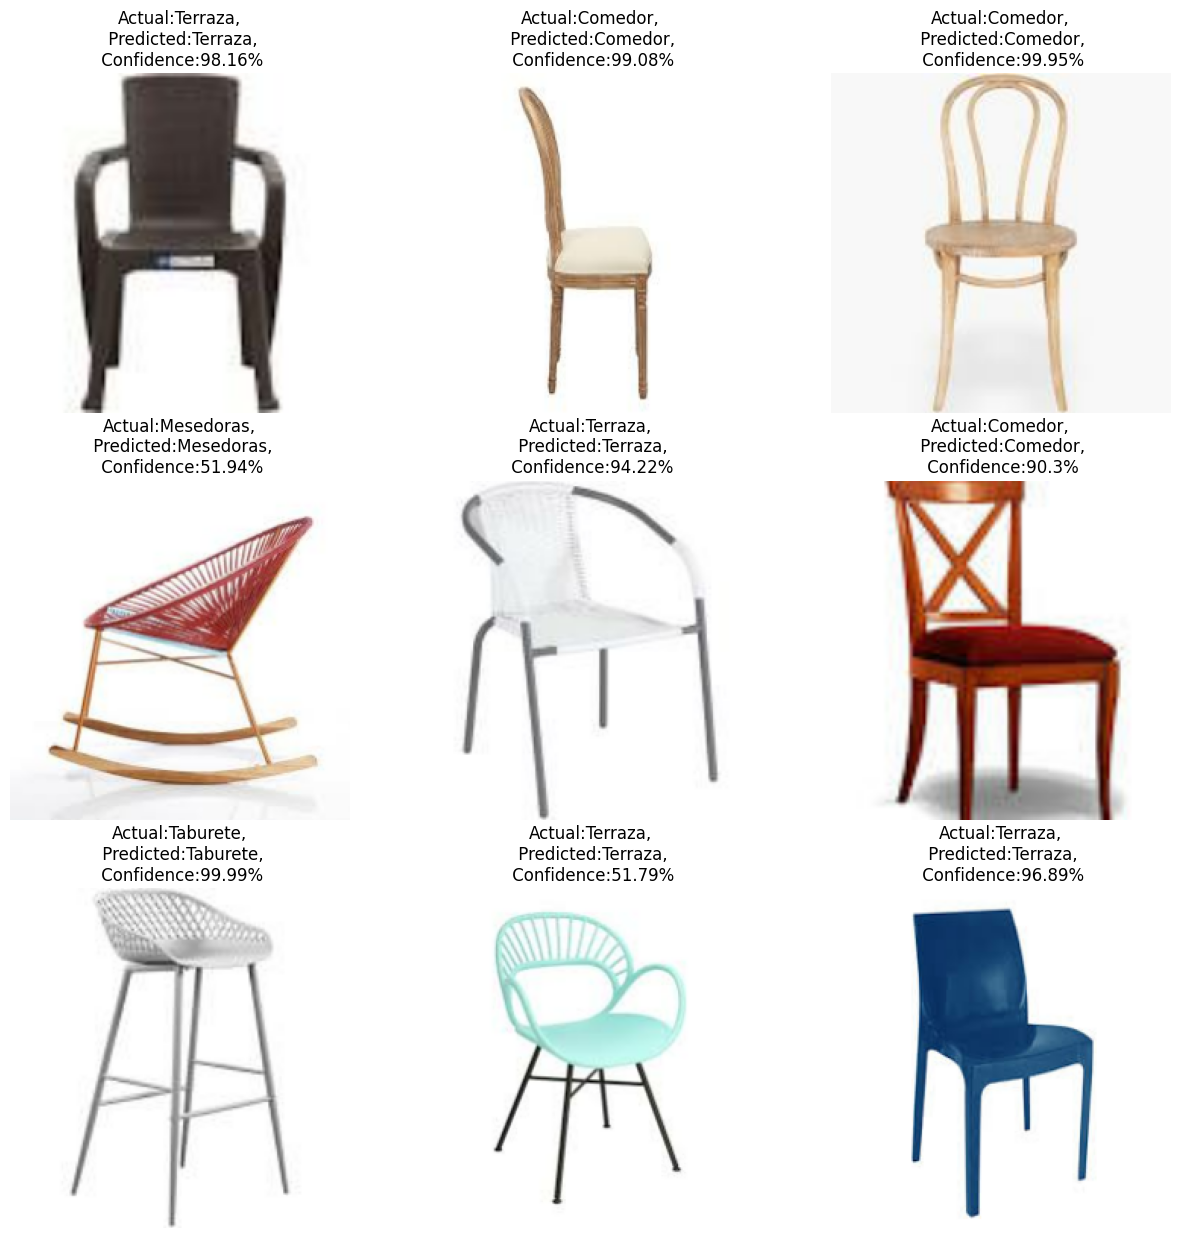

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    axis=plt.subplot(3,3,i+1)

    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:

model.save('chairmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
